In [3]:
import numpy as np
import matplotlib.image as mpimg
import scipy.ndimage
from matplotlib import pyplot as plt

from domain import gp_domain

In [4]:
# Read domain
im = mpimg.imread('star.png')

# Resize
im = scipy.ndimage.zoom(im, 0.3125, order=2)

# Convert to mask
foo = np.amax(im[:,:,:2],2)<0.5

# Pad boundary
mask = np.zeros((foo.shape[0]+2,foo.shape[1]+2),dtype=bool)
mask[1:-1,1:-1] = foo

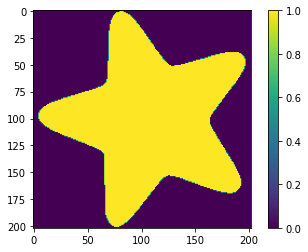

In [8]:
plt.imshow(mask)
plt.colorbar()

In [9]:
# Number of basis functions
ms = 8

In [10]:
# Make domain (takes a while)
domain = gp_domain(mask,(0,1),(0,1),ms)

In [11]:
# Test points
X1, X2 = np.mgrid[0:1:100j, 0:1:100j]
XT = np.vstack((X1.flatten(), X2.flatten())).T
XT

array([[0.        , 0.        ],
       [0.        , 0.01010101],
       [0.        , 0.02020202],
       ...,
       [1.        , 0.97979798],
       [1.        , 0.98989899],
       [1.        , 1.        ]])

In [15]:
# Evaluate basis functions at test inputs
V = domain.eigenfun(XT)
V.shape

(10000, 8)

/home/mochar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


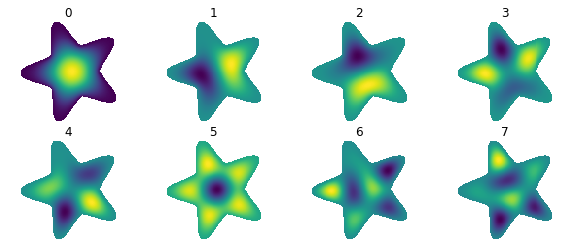

In [28]:
# Visualize the basis functions (color scale arbitrary)
fig, axs = plt.subplots(2, 4, figsize=(10, 4))
axs = axs.ravel()
for j in range(ms):
    ind = V[:,j]==0
    V[ind,j]=float('NaN')
    axs[j].pcolormesh(X1, X2, V[:,j].reshape(100, 100))
    axs[j].set_title(str(j))
    axs[j].axis('equal')
    axs[j].axis('off')

## Generate dataset

In [183]:
def generate_U(sizex=30, sizey=10):
    ax = np.linspace(0, 4, sizex)
    ay = np.repeat(1, sizex)

    bx = np.repeat(4, sizey)
    by = np.linspace(1, 0, sizey)

    cx = np.linspace(4, 0, sizex)
    cy = np.repeat(0, sizex)

    x = np.r_[ax, bx, cx]
    y = np.r_[ay, by, cy]
    
    return np.c_[x, y]

In [184]:
X = generate_U()
x_ = np.linspace(0, 1, X.shape[0])
noise = np.random.normal(scale=.1, size=X.shape[0])
lin_u = 2 * x_ + noise
sin_u = np.sin(14 * x_) + noise * 0.03
prod_u = lin_u * sin_u

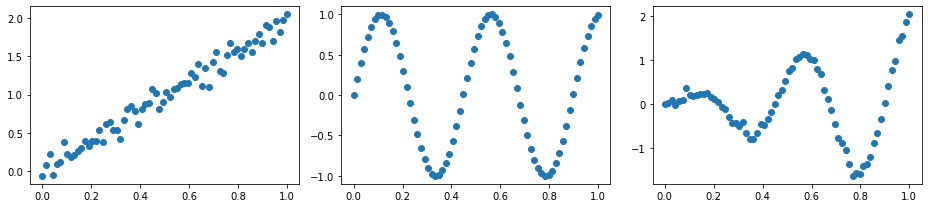

In [185]:
fig, axs = plt.subplots(figsize=(13, 3), ncols=3)
axs[0].scatter(x_, lin_u)
axs[1].scatter(x_, sin_u)
axs[2].scatter(x_, prod_u)
plt.tight_layout()

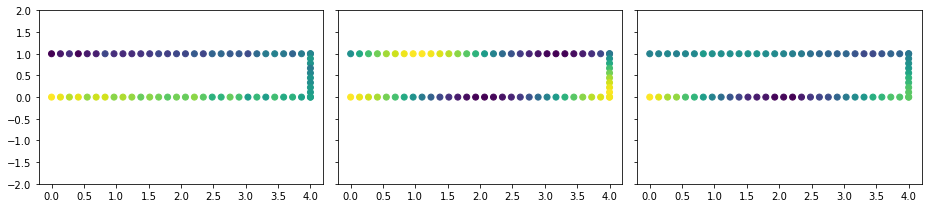

In [186]:
fig, axs = plt.subplots(figsize=(13, 3), ncols=3, sharex=True, sharey=True)
axs[0].scatter(X[:, 0], X[:, 1], c=lin_u)
axs[1].scatter(X[:, 0], X[:, 1], c=sin_u)
axs[2].scatter(X[:, 0], X[:, 1], c=prod_u)
plt.ylim(-2, 2)
plt.tight_layout()

## Generate dataset

In [616]:
mask = np.r_[
    np.zeros((35, 196)),
    np.ones((50, 196)),
    np.c_[np.zeros((30, 150)), np.ones((30, 46))],
    np.ones((50, 196)),
    np.zeros((35, 196))
]
# pad
mask = np.c_[np.zeros((200, 2)), mask, np.zeros((200, 2))]
mask = mask == 1
mask.shape

(200, 200)

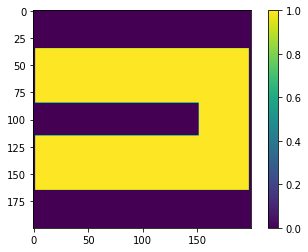

In [617]:
plt.imshow(mask)
plt.colorbar()

In [641]:
# Number of basis functions
ms = 8

# Make domain (takes a while)
domain = gp_domain(mask,(0,1),(0,1),ms)

In [648]:
domain.V.shape

(40000, 8)

In [619]:
# Test points
X1, X2 = np.mgrid[0:1:100j, 0:1:100j]
XT = np.vstack((X1.flatten(), X2.flatten())).T

In [642]:
# Evaluate basis functions at test inputs
VT = domain.eigenfun(XT)
VT.shape

(10000, 8)

/home/mochar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


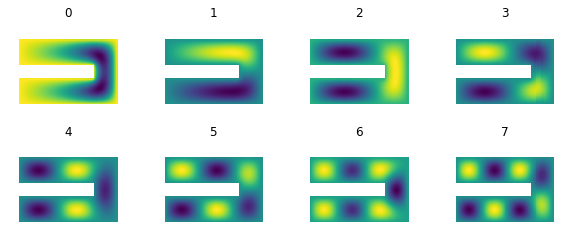

In [643]:
# Visualize the basis functions (color scale arbitrary)
fig, axs = plt.subplots(2, 4, figsize=(10, 4))
axs = axs.ravel()
for j in range(ms):
    ind = VT[:,j]==0
    VT[ind,j]=float('NaN')
    axs[j].pcolormesh(X1, X2, VT[:,j].reshape(100, 100))
    axs[j].set_title(str(j))
    axs[j].axis('equal')
    axs[j].axis('off')

In [626]:
inside = np.where(~np.isnan(VT).all(1))[0]
X = XT[inside]
V = VT[inside]

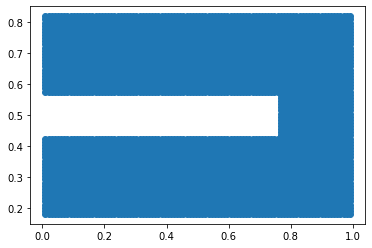

In [627]:
plt.scatter(X[:, 0], X[:, 1])

Order cells along U shape.

In [628]:
ind_a = np.where(X[:, 1] > 0.55)[0]
ord_a = np.argsort(X[ind_a, 0])

ind_b = np.where((X[:, 1] > .45) & (X[:, 1] < 0.55))[0]
ord_b = np.argsort(X[ind_b, 1])[::-1]

ind_c = np.where(X[:, 1] < 0.45)[0]
ord_c = np.argsort(X[ind_c, 0])[::-1]

order = np.empty(X.shape[0], dtype=int)
order[ind_a[ord_a]] = np.arange(ind_a.shape[0])
order[ind_b[ord_b]] = np.arange(ind_b.shape[0]) + ind_a.shape[0]
order[ind_c[ord_c]] = np.arange(ind_c.shape[0]) + ind_a.shape[0] + ind_b.shape[0]

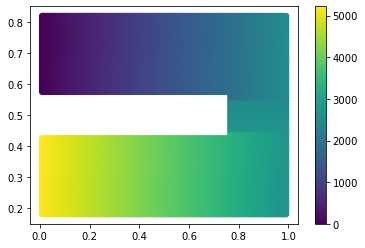

In [629]:
plt.scatter(X[:, 0], X[:, 1], c=order)
plt.colorbar()

In [630]:
X = X[np.argsort(order)]

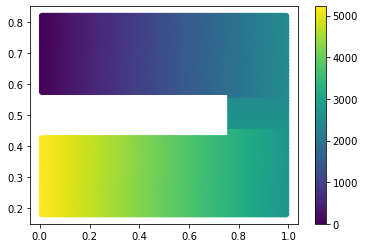

In [631]:
plt.scatter(X[:, 0], X[:, 1], c=np.arange(X.shape[0]))
plt.colorbar()

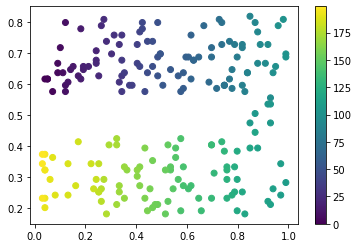

In [632]:
sub = np.random.choice(X.shape[0], 200)
sub = np.sort(sub) # preserve order
plt.scatter(X[sub, 0], X[sub, 1], c=np.arange(sub.shape[0]))
plt.colorbar()

#### Function values

In [633]:
Xsub = X[sub]
Xsub.shape

(200, 2)

In [634]:
x_ = np.linspace(0, 1, Xsub.shape[0])
noise = np.random.normal(scale=.2, size=Xsub.shape[0])
lin_u = 3 * x_ + noise
sin_u = (np.sin(14 * x_) + noise) * 0.03
prod_u = lin_u * sin_u

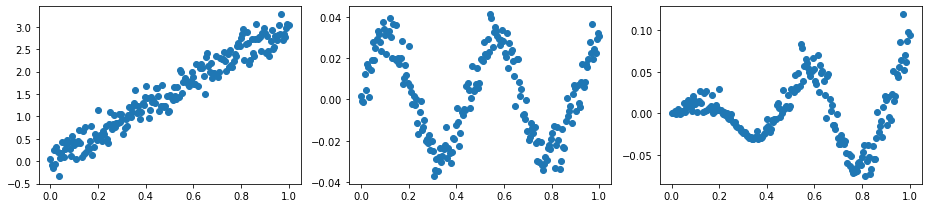

In [635]:
fig, axs = plt.subplots(figsize=(13, 3), ncols=3)
axs[0].scatter(x_, lin_u)
axs[1].scatter(x_, sin_u)
axs[2].scatter(x_, prod_u)
plt.tight_layout()

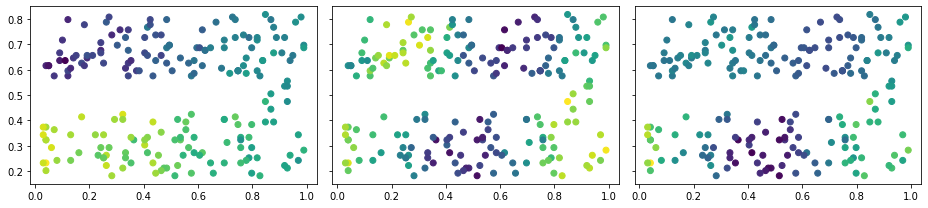

In [636]:
fig, axs = plt.subplots(figsize=(13, 3), ncols=3, sharex=True, sharey=True)
axs[0].scatter(Xsub[:, 0], Xsub[:, 1], c=lin_u)
axs[1].scatter(Xsub[:, 0], Xsub[:, 1], c=sin_u)
axs[2].scatter(Xsub[:, 0], Xsub[:, 1], c=prod_u)
# plt.ylim(-2, 2)
plt.tight_layout()

In [638]:
# Evaluate basis functions at test inputs
V = domain.eigenfun(X)
V.shape

(5222, 8)

In [639]:
Vsub = V[sub]
Vsub.shape

(200, 8)

#### GP

Make a bunch of f's.

In [640]:
fs = (np.sin(np.linspace(5, 30, 10).reshape(-1, 1) * x_) + noise) * 0.03
fs = fs.T
fs.shape

(200, 10)

In [653]:
np.array([[2, 4], [3, 8]]) 

array([[2, 4],
       [3, 8]])

In [654]:
np.array([[2, 4], [3, 8]]) * np.array([2, .5])

array([[4., 2.],
       [6., 4.]])

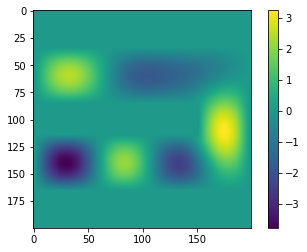

In [675]:
a = (domain.V * Vsub[199, :]).sum(1).reshape(200,200)
plt.imshow(a)
plt.colorbar()

In [661]:
a = mask.astype(float)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])